<a href="https://colab.research.google.com/github/wawa6609/googlecolab/blob/master/darknet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/yolov4
#%cd darknet/

/content/drive/My Drive/yolov4


In [6]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


#Installing cudnn

In [ ]:
!mkdir cudnn

Download correct archive from nvidia page and copy it to cudnn folder. <br>
https://developer.nvidia.com/cudnn

In [12]:
!tar -xzvf cudnn/cudnn-10.1-linux-x64-v7.6.5.32.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h
#!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

mkdir: cannot create directory ‘cudnn’: File exists
cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.6.5
cuda/lib64/libcudnn_static.a


#Downloading darknet

In [2]:
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 13781, done.
remote: Total 13781 (delta 0), reused 0 (delta 0), pack-reused 13781
Receiving objects: 100% (13781/13781), 12.36 MiB | 6.35 MiB/s, done.
Resolving deltas: 100% (9407/9407), done.
Checking out files: 100% (2006/2006), done.


#Installing/enabling darknet

In [3]:
%cd darknet/
!make
#!chmod +x ./darknet

/content/drive/My Drive/yolov4/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -ffp-contract=fast -mavx -mavx2 -msse3 -msse4.1 -msse4.2 -msse4a -Ofast -DOPENCV -fopenmp -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variab

#Downloading yolo weights

In [4]:
!mkdir weights
%cd weights/

# yolov2
#!wget https://pjreddie.com/media/files/yolov2.weights

# yolov3
#!wget https://pjreddie.com/media/files/yolov3.weights

# yolov3-tiny
#!wget https://pjreddie.com/media/files/yolov3-tiny.weights

# pretrained weights
!wget https://pjreddie.com/media/files/darknet53.conv.74

%cd ..

/content/drive/My Drive/yolov4/darknet/weights
--2020-07-04 20:15:07--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  3.92MB/s    in 49s     

2020-07-04 20:15:57 (3.18 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]

/content/drive/My Drive/yolov4/darknet


#Own data for net training

In [5]:
!cp -r ../MyNet/data/* build/darknet/x64/data/

##Labels

In [52]:
#!cp build/darknet/x64/data/train/_darknet.labels build/darknet/x64/data/obj.names
!mv data/coco.names data/coco_old.names
!cp build/darknet/x64/data/obj.names data/coco.names
#!mv data/coco_old.names data/coco.names

## obj.data file

In [7]:
obj_data = """classes= 1
train  = build/darknet/x64/data/train.txt
valid  = build/darknet/x64/data/valid.txt
names = build/darknet/x64/data/obj.names
backup = build/darknet/x64/backup/
"""

file = """text_file = open("build/darknet/x64/data/obj.data", "w");text_file.write(obj_data);text_file.close()""" 

exec(file)
%pycat build/darknet/x64/data/obj.data

In [8]:
# obj_data = """classes= 1
# train  = data/train.txt
# valid  = data/valid.txt
# names = data/obj.names
# backup = backup/
# """

# file = """text_file = open("data/obj.data", "w");text_file.write(obj_data);text_file.close()""" 

# exec(file)
# %pycat data/obj.data

##Train file and valid file

In [15]:
!ls build/darknet/x64/data/train/*.jpg > build/darknet/x64/data/train.txt
!ls build/darknet/x64/data/valid/*.jpg > build/darknet/x64/data/valid.txt
!ls build/darknet/x64/data/test/*.jpg > build/darknet/x64/data/test.txt

#Starting net training

In [ ]:
!./darknet detector train build/darknet/x64/data/obj.data cfg/myown.cfg weights/darknet53.conv.74 -dont_show -map

#Resuming training

In [ ]:
!cp build/darknet/x64/backup/myown_last.weights weights/myown.weights
!./darknet detector train build/darknet/x64/data/obj.data cfg/myown.cfg weights/myown.weights -dont_show -map

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	 

#Copying best weights

In [ ]:
!cp build/darknet/x64/backup/myown_best.weights weights/myown.weights

# Plotting the training accuracy history

In [ ]:
!./darknet detector map build/darknet/x64/data/obj.data cfg/myown.cfg weights/myown.weights -dont_show
from IPython.display import Image, display
display(Image('chart.png'))
#display(Image('chart_myown.png'))

#Example detection

In [ ]:
# yolov2
#!./darknet detect cfg/yolov2.cfg weights/yolov2.weights data/person.jpg

# yolov3-tiny
#!./darknet detect cfg/yolov3-tiny.cfg weights/yolov3-tiny.weights data/giraffe.jpg

# yolov3
#!./darknet detect cfg/yolov3.cfg weights/yolov3.weights data/dog.jpg

# myown
!./darknet detect cfg/myown.cfg weights/myown.weights build/darknet/x64/data/train/h4_jpg.rf.942029f9ce5b60e424ddda5d420c1d9c.jpg -dont_show -thresh 0.2 

# Checking net accuracy

In [ ]:
!./darknet detector test build/darknet/x64/data/obj.data cfg/myown.cfg weights/myown.weights -dont_show < build/darknet/x64/data/train.txt

#Displaying detections

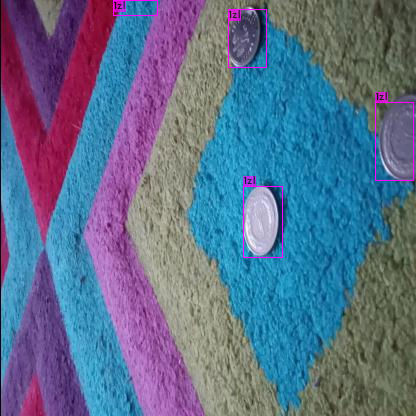

In [61]:
from IPython.display import Image, display
display(Image('predictions.jpg'))